In [1]:
import pandas as pd
from pandas import DataFrame, Series
#false positive warnings all the time:
pd.options.mode.chained_assignment = None

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
import statistics

import os.path

In [2]:
#http://matplotlib.org/1.4.0/users/customizing.html

plt.style.use('ggplot')

mpl.rcParams['font.size'] = 18

### LINES
mpl.rcParams['lines.linewidth'] = '2.0'        # line width in points
mpl.rcParams['lines.marker']    = 'None'
mpl.rcParams['lines.markersize']=  '6'          # markersize, in points

###LEGEND
mpl.rcParams['legend.fontsize']='medium'

### GRIDS
mpl.rcParams['grid.color']='black'     # grid color
mpl.rcParams['grid.linestyle'] =':'    # dotted
mpl.rcParams['grid.linewidth']='0.5'   # in points
mpl.rcParams['grid.alpha']='1.0'       # transparency, between 0.0 and 1.0

### TICKS
mpl.rcParams['xtick.labelsize']="small"  # fontsize of the tick labels
mpl.rcParams['xtick.direction']="out"      # direction: in, out, or inout
mpl.rcParams['ytick.labelsize']="small"   # fontsize of the tick labels
mpl.rcParams['ytick.direction']="out"      # direction: in, out, or inout

### AXES
mpl.rcParams['axes.linewidth']  =  '1.0'    # edge linewidth
mpl.rcParams['axes.grid']       =  'True'   # display grid or not
mpl.rcParams['axes.titlesize']  =  'large'  # fontsize of the axes title
mpl.rcParams['axes.labelsize']  = 'large'  # fontsize of the x any y labels
mpl.rcParams['axes.facecolor']= 'white'     # axes background color

mpl.rcParams['figure.facecolor']= '1.0'     # figure facecolor; 0.75 is scalar gray

In [3]:
def generateSimulationID(tup):
    identifier = tup[0] \
            + "_N" + str(tup[1]) \
            + "_" + str(tup[2]) \
            + "_" + tup[3] \
            + "_" + tup[4] \
    
    extra = ""
    if len(tup[5]) !=0:
        extra = "_" + str(tup[5])
    
    return identifier+extra


simulation_map = {
    "Watdiv10M": "W10", "Watdiv100M": "W100", "Watdiv1000M": "W1000", "Ontoforce": "Ont"
}

def generateSimulationIDCompact(tup, pref_length=3):
    #pref_length = 3
    identifier = tup[0][:pref_length] \
            + "_N" + str(tup[1]) \
            + "_" + str(tup[2]) \
            + "_" + simulation_map[tup[3]] \
            + "_" + str(tup[4])[:pref_length] \
    
    extra = ""
    if len(tup[5]) !=0:
        extra = "_" + str(tup[5])
    
    return identifier+extra

In [4]:
def generateFilenameQueryEventsCorrect(bmtuple):
    fname = './csv_correct/' +  bmtuple[0] + "_N" + str(bmtuple[1]) + "_" + str(bmtuple[2]) + "_" + bmtuple[3] + "_" + bmtuple[4]
    if len(str(bmtuple[5])) != 0:
        fname = fname + "_" + str(bmtuple[5])
    return fname + "_queryevents_correct.csv"

# Create a PC coordinates visualization shedding light on the reason an engine fails, timeouts, gives an error

In [7]:
query_features = './OntoforceQueryAnalysis/ontoforce_query_features.tsv'
df_queryfeatures = pd.read_csv(query_features, sep='\t', index_col=0)


df_queryfeatures.head(n=5)

,order,filter_in,limit,distinct,triplePattern,tp_?po,union,tp_?p?,aggregation_count,tp_sp?,...,graph,optional,keys,filter,tp_???,group,query,jsonLines,jsonSize,depth
xaa,0.0,2.0,0.0,1.0,14.0,0.0,1.0,8.0,1.0,0.0,...,0.0,1.0,49.0,13.0,6.0,0.0,3.0,313.0,10373.0,5.0
xab,1.0,1.0,1.0,1.0,5.0,0.0,0.0,3.0,1.0,0.0,...,0.0,2.0,35.0,5.0,2.0,0.0,2.0,180.0,4114.0,4.0
xac,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,7.0,0.0,0.0,0.0,1.0,26.0,609.0,2.0
xad,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,8.0,0.0,0.0,0.0,1.0,33.0,839.0,2.0
xae,0.0,1.0,0.0,1.0,4.0,0.0,0.0,2.0,1.0,0.0,...,0.0,1.0,23.0,5.0,2.0,0.0,1.0,127.0,2775.0,3.0


In [8]:
tuple_list = [('Blazegraph', 1, 64, 'Ontoforce', 'Optimized', ''), \
              ('ES', 1, 64, 'Ontoforce', 'Default', ''), \
              ('GraphDB', 1, 64, 'Ontoforce', 'Optimized', ''), \
              ('Virtuoso', 1, 64, 'Ontoforce', 'Optimized', ''), \
              ('Virtuoso', 1, 32,'Ontoforce', 'Optimized', 'VWall'), \
              ('Virtuoso', 3, 64,'Ontoforce', 'Optimized', '0'), \
              ('Virtuoso', 3, 64,'Ontoforce', 'Optimized', '2') \
             ]

In [9]:
filename = generateFilenameQueryEventsCorrect(tuple_list[1])
df = pd.read_csv(filename, sep='\t')
df.index = df['query_name'].apply(lambda q: q[8:]).values

df.head(n=5)

,sim_id,query_name,thread_id,thread_type,order_id,number_of_results,runtime,flag,correct
xzasi,ES_N1_64_Ont_Def,queries/xzasi,1,warmup,1,1,4.327736,SUCCESS,CORRECT
xzasi,ES_N1_64_Ont_Def,queries/xzasi,53,stress,1029,1,13.472665,SUCCESS,CORRECT
xzasi,ES_N1_64_Ont_Def,queries/xzasi,51,stress,601,1,28.591350,SUCCESS,CORRECT
xzasi,ES_N1_64_Ont_Def,queries/xzasi,52,stress,1179,1,29.814031,SUCCESS,CORRECT
xzasi,ES_N1_64_Ont_Def,queries/xzasi,49,stress,777,-1,-1.000000,ERROR,INCORRECT


In [10]:
pd.crosstab(df['flag'], df['correct'])

correct,CORRECT,INCORRECT,UNCERTAIN
flag,,,
ERROR,0,1830,0
SUCCESS,4246,1,4
TIMEOUT,0,1257,0


In [11]:
#wrong result => orange
#timeout => yellow
#HTTP error => red 
#success => whitesmoke

In [12]:
df2 = df.drop(['sim_id', 'query_name', 'thread_type', 'runtime', 'number_of_results', 'thread_id', 'order_id'],axis=1)



#df2['class'] = df2['flag'] + "_"+  df2['correct']


In [13]:
def convertflag(flag):
    if flag == 'SUCCESS':
        return 1
    elif flag == 'ERROR':
        return 0
    else:
        return 0

def convertcorrect(c):
    if c == 'CORRECT':
        return 1
    elif c == 'INCORRECT':
        return 0
    else:
        return 0
    

df2['flag2'] = df2['flag'].apply(convertflag)
df2['correct2'] = df2['flag'].apply(convertcorrect)
df2['class'] = df2['flag2'] * df2['correct2']
df3 = df2.drop(['flag', 'correct', 'flag2', 'correct2'],axis=1)
df3

,class
xzasi,0
xzasi,0
xzasi,0
xzasi,0
xzasi,0
xzasi,0
xzaqx,0
xzaqx,0
xzaqx,0
xzaqx,0


In [14]:
df4 = df3.join(df_queryfeatures)
df4

,class,order,filter_in,limit,distinct,triplePattern,tp_?po,union,tp_?p?,aggregation_count,...,graph,optional,keys,filter,tp_???,group,query,jsonLines,jsonSize,depth
xaa,0,0.0,2.0,0.0,1.0,14.0,0.0,1.0,8.0,1.0,...,0.0,1.0,49.0,13.0,6.0,0.0,3.0,313.0,10373.0,5.0
xaa,0,0.0,2.0,0.0,1.0,14.0,0.0,1.0,8.0,1.0,...,0.0,1.0,49.0,13.0,6.0,0.0,3.0,313.0,10373.0,5.0
xaa,0,0.0,2.0,0.0,1.0,14.0,0.0,1.0,8.0,1.0,...,0.0,1.0,49.0,13.0,6.0,0.0,3.0,313.0,10373.0,5.0
xaa,0,0.0,2.0,0.0,1.0,14.0,0.0,1.0,8.0,1.0,...,0.0,1.0,49.0,13.0,6.0,0.0,3.0,313.0,10373.0,5.0
xaa,0,0.0,2.0,0.0,1.0,14.0,0.0,1.0,8.0,1.0,...,0.0,1.0,49.0,13.0,6.0,0.0,3.0,313.0,10373.0,5.0
xaa,0,0.0,2.0,0.0,1.0,14.0,0.0,1.0,8.0,1.0,...,0.0,1.0,49.0,13.0,6.0,0.0,3.0,313.0,10373.0,5.0
xab,0,1.0,1.0,1.0,1.0,5.0,0.0,0.0,3.0,1.0,...,0.0,2.0,35.0,5.0,2.0,0.0,2.0,180.0,4114.0,4.0
xab,0,1.0,1.0,1.0,1.0,5.0,0.0,0.0,3.0,1.0,...,0.0,2.0,35.0,5.0,2.0,0.0,2.0,180.0,4114.0,4.0
xab,0,1.0,1.0,1.0,1.0,5.0,0.0,0.0,3.0,1.0,...,0.0,2.0,35.0,5.0,2.0,0.0,2.0,180.0,4114.0,4.0
xab,0,1.0,1.0,1.0,1.0,5.0,0.0,0.0,3.0,1.0,...,0.0,2.0,35.0,5.0,2.0,0.0,2.0,180.0,4114.0,4.0


In [15]:
from pandas.plotting import parallel_coordinates

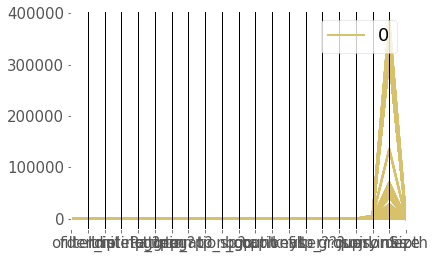

In [16]:
parallel_coordinates(df4, 'class', )

In [17]:
import plotly
key = 'tViNwiZvOZHOpRTVQK4i'
plotly.tools.set_credentials_file(username='drdwitte', api_key=key)


In [18]:
import plotly.plotly as py
import plotly.graph_objs as go


In [19]:
pd.crosstab(df['flag'], df['correct'])

#wrong result => orange
#timeout => yellow
#HTTP error => red 
#success => whitesmoke

correct,CORRECT,INCORRECT,UNCERTAIN
flag,,,
ERROR,0,1830,0
SUCCESS,4246,1,4
TIMEOUT,0,1257,0


In [20]:
df4

cols = list(df4.columns[1:])

ax_min = df_queryfeatures.min().values
ax_max = df_queryfeatures.max().values

print(len(cols))
dims = []
for i in range(len(cols)):
    
    d = dict(range = [ax_min[i],ax_max[i]], label = cols[i], values = df4[cols[i]])
    
    dims.append(d)



data = [
    go.Parcoords(
        line = dict(color = df4['class'],
                   colorscale = [[0,'red'],[1,'white']]),
        dimensions = list(dims)
    )
]

layout = go.Layout(
    plot_bgcolor = 'white',
    paper_bgcolor = 'white'
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'parcoords-basic')

21


In [21]:
df4.columns

Index(['class', 'order', 'filter_in', 'limit', 'distinct', 'triplePattern',
       'tp_?po', 'union', 'tp_?p?', 'aggregation_count', 'tp_sp?', 'bgp',
       'graph', 'optional', 'keys', 'filter', 'tp_???', 'group', 'query',
       'jsonLines', 'jsonSize', 'depth'],
      dtype='object')

In [22]:
operator_cols = ['class', 'order', 'filter_in', 'distinct', 'union', 'aggregation_count', 'optional', 'filter', 'group']
df5 = df4[operator_cols]

In [23]:
df5.loc[:,operator_cols] = df5[operator_cols].applymap(lambda x: x + np.random.rand()/100.0)

df55 = df5.groupby(df5.index).first()

cols = list(df55.columns[1:])

ax_min = df55.min().values[1:]
ax_max = df55.max().values[1:]

print(len(cols))
dims = []
for i in range(len(cols)):
    
    d = dict(range = [ax_min[i],ax_max[i]], label = cols[i], values = df55[cols[i]])
    
    dims.append(d)



data = [
    go.Parcoords(
        line = dict(color = df55['class'],
        colorscale = [[0,'red'],[1,'white']]),
   
        dimensions = list(dims)
    )
]

layout = go.Layout(
    plot_bgcolor = 'white',
    paper_bgcolor = 'white'
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'parcoords-operators')

8


In [24]:
df4.columns

Index(['class', 'order', 'filter_in', 'limit', 'distinct', 'triplePattern',
       'tp_?po', 'union', 'tp_?p?', 'aggregation_count', 'tp_sp?', 'bgp',
       'graph', 'optional', 'keys', 'filter', 'tp_???', 'group', 'query',
       'jsonLines', 'jsonSize', 'depth'],
      dtype='object')

In [25]:
tp_cols = ['class', 'bgp', 'triplePattern', 'tp_???' ,'tp_?p?', 'tp_?po', 'tp_sp?']
df5 = df4[tp_cols]

In [26]:
df5.loc[:,tp_cols] = df5[tp_cols].applymap(lambda x: x + np.random.rand()/1.000)

cols = list(df5.columns[1:])

ax_min = df5.min().values[1:]
ax_max = df5.max().values[1:]

print(len(cols))
dims = []
for i in range(len(cols)):
    
    d = dict(range = [ax_min[i],ax_max[i]], label = cols[i], values = df5[cols[i]])
    
    dims.append(d)



data = [
    go.Parcoords(
        line = dict(color = df5['class'],
        colorscale = [[0,'red'],[1,'whitesmoke']]),
   
        dimensions = list(dims)
    )
]

layout = go.Layout(
    plot_bgcolor = 'white',
    paper_bgcolor = 'white'
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'parcoords-operators')

6


In [27]:
df5

,class,bgp,triplePattern,tp_???,tp_?p?,tp_?po,tp_sp?
xaa,0.409984,3.712452,14.559073,6.671817,8.684633,0.178624,0.205318
xaa,0.912135,3.229864,14.632644,6.342330,8.672444,0.141203,0.688111
xaa,0.183017,3.001726,14.170988,6.687624,8.587087,0.150028,0.077265
xaa,0.324494,3.726690,14.525138,6.015419,8.710606,0.901471,0.620847
xaa,0.846114,3.323628,14.504603,6.268764,8.276521,0.807487,0.214080
xaa,0.788039,3.763139,14.949709,6.750568,8.591235,0.739550,0.673110
xab,0.897087,4.061718,5.546544,2.189039,3.278729,0.024428,0.671494
xab,0.669378,4.663468,5.950118,2.771487,3.348528,0.758847,0.342740
xab,0.317247,4.737781,5.488982,2.928212,3.690213,0.639985,0.931542
xab,0.992181,4.994530,5.737453,2.575480,3.986456,0.087842,0.248476


In [28]:
operator_cols = ['class', 'order', 'filter_in', 'distinct', 'union', 'aggregation_count', 'optional', 'filter', 'group']
df5 = df4[operator_cols]

In [29]:

df5

,class,order,filter_in,distinct,union,aggregation_count,optional,filter,group
xaa,0,0.0,2.0,1.0,1.0,1.0,1.0,13.0,0.0
xaa,0,0.0,2.0,1.0,1.0,1.0,1.0,13.0,0.0
xaa,0,0.0,2.0,1.0,1.0,1.0,1.0,13.0,0.0
xaa,0,0.0,2.0,1.0,1.0,1.0,1.0,13.0,0.0
xaa,0,0.0,2.0,1.0,1.0,1.0,1.0,13.0,0.0
xaa,0,0.0,2.0,1.0,1.0,1.0,1.0,13.0,0.0
xab,0,1.0,1.0,1.0,0.0,1.0,2.0,5.0,0.0
xab,0,1.0,1.0,1.0,0.0,1.0,2.0,5.0,0.0
xab,0,1.0,1.0,1.0,0.0,1.0,2.0,5.0,0.0
xab,0,1.0,1.0,1.0,0.0,1.0,2.0,5.0,0.0


In [30]:
df55 = df5.groupby(df5.index).first()

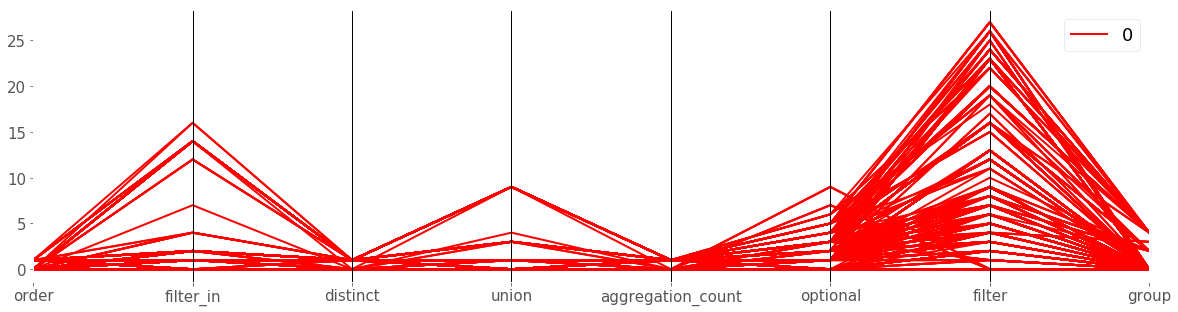

In [31]:
fig, ax = plt.subplots(1,1,figsize=(20,5))

parallel_coordinates(df55, class_column='class', cols=list(df55.columns[1:]), ax=ax, colormap='prism')

In [32]:
df5

,class,order,filter_in,distinct,union,aggregation_count,optional,filter,group
xaa,0,0.0,2.0,1.0,1.0,1.0,1.0,13.0,0.0
xaa,0,0.0,2.0,1.0,1.0,1.0,1.0,13.0,0.0
xaa,0,0.0,2.0,1.0,1.0,1.0,1.0,13.0,0.0
xaa,0,0.0,2.0,1.0,1.0,1.0,1.0,13.0,0.0
xaa,0,0.0,2.0,1.0,1.0,1.0,1.0,13.0,0.0
xaa,0,0.0,2.0,1.0,1.0,1.0,1.0,13.0,0.0
xab,0,1.0,1.0,1.0,0.0,1.0,2.0,5.0,0.0
xab,0,1.0,1.0,1.0,0.0,1.0,2.0,5.0,0.0
xab,0,1.0,1.0,1.0,0.0,1.0,2.0,5.0,0.0
xab,0,1.0,1.0,1.0,0.0,1.0,2.0,5.0,0.0
